<a href="https://colab.research.google.com/github/Beni25-mak/Travail_memoire_beni_nzimba/blob/main/Analysis_01122025_ok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Chargement des packages ou ressources utilisées pour Random Forest**

In [3]:
## Chargement des ressources
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sy
import geopandas
import rasterio
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, roc_auc_score
import joblib
from scipy.interpolate import griddata
from sklearn.utils import resample
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
print(f"les Ressources sont bien installées")

les Ressources sont bien installées


# Exploration des données et inspection initiales

**1. Chargement des données**

Notre dataset est stocké dans le **drive**, il faut maintenant se connecter dans le drive.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#data_brute = pd.read_csv("dataset.csv")/content/drive/MyDrive/dataset.csv
data_brute = pd.read_csv("/content/drive/MyDrive/dataset.csv")
print(f"la structure des données : {data_brute.shape}")

la structure des données : (7470837, 22)


In [5]:
print(f"Total des données dans la bases des données: {data_brute.shape[0]}")
print(f"Total des variables dans la bases des données: {data_brute.shape[1]}")
print(f"\nAfficher les noms de 22 variables : {data_brute.columns}")

Total des données dans la bases des données: 7470837
Total des variables dans la bases des données: 22

Afficher les noms de 22 variables : Index(['X', 'Y', 'id', 'DEM_Seke B', 'DEM_SK_rep', 'twi', 'Aspect copie',
       'plan_curvature', 'general_curvature', 'profil_curvature', 'TRI_1',
       'Distance_faults', 'NDBI_SK_ok', 'TPI', 'pente_sk', 'ndwi_ok', 'ndmi',
       'ndvi_ok', 'Mineralogie_projectée', 'DEM_lithologique', 'Elevation',
       'DEM_SK_reprojecte'],
      dtype='object')


In [6]:
data_brute.columns = data_brute.columns.str.strip()
data_brute.columns = data_brute.columns.str.replace(' ', '_')
data_brute.columns = data_brute.columns.str.replace('-', '_')
data_brute.columns = data_brute.columns.str.lower()

In [7]:
print(f"Description des variables: {data_brute.info()}")
#print(f"\nNature des variables : {data_brute.dtypes}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7470837 entries, 0 to 7470836
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   x                      float64
 1   y                      float64
 2   id                     int64  
 3   dem_seke_b             float64
 4   dem_sk_rep             float64
 5   twi                    float64
 6   aspect_copie           float64
 7   plan_curvature         float64
 8   general_curvature      float64
 9   profil_curvature       float64
 10  tri_1                  float64
 11  distance_faults        float64
 12  ndbi_sk_ok             float64
 13  tpi                    float64
 14  pente_sk               float64
 15  ndwi_ok                float64
 16  ndmi                   float64
 17  ndvi_ok                float64
 18  mineralogie_projectée  float64
 19  dem_lithologique       float64
 20  elevation              float64
 21  dem_sk_reprojecte      float64
dtypes: float64(21), in

In [8]:
data_brute_considere = data_brute.drop(['dem_seke_b','dem_sk_rep','dem_sk_reprojecte'], axis=1)

In [9]:
data_brute_considere.columns

Index(['x', 'y', 'id', 'twi', 'aspect_copie', 'plan_curvature',
       'general_curvature', 'profil_curvature', 'tri_1', 'distance_faults',
       'ndbi_sk_ok', 'tpi', 'pente_sk', 'ndwi_ok', 'ndmi', 'ndvi_ok',
       'mineralogie_projectée', 'dem_lithologique', 'elevation'],
      dtype='object')

In [ ]:
data_brute_considere.shape

(7470837, 19)

In [ ]:
data_brute_considere = data_brute_considere.rename(columns={
    'aspect_copie': 'Aspect',
    'x': 'X',
    'y': 'Y',
    'id': 'Id',
    'tri_1': 'TRI',
    'ndbi_sk_ok':'NDBI',
    'pente_sk':'Pente',
    'ndwi_ok' : 'NDWI',
    'ndvi_ok' : 'NDVI',
    'mineralogie_projectée' : 'Mineralogie',
    'dem_lithologique' : 'Lithologique',
    'ndmi' : 'NDMI',
    'elevation' : 'Elevation',
    'twi':'TWI',
    'tpi':'TPI',
    'distance_faults':'Distance_faults'
})

In [ ]:
data_brute_considere.columns.values.tolist()

['X',
 'Y',
 'Id',
 'TWI',
 'Aspect',
 'plan_curvature',
 'general_curvature',
 'profil_curvature',
 'TRI',
 'Distance_faults',
 'NDBI',
 'TPI',
 'Pente',
 'NDWI',
 'NDMI',
 'NDVI',
 'Mineralogie',
 'Lithologique',
 'Elevation']

In [ ]:
data_brute_considere.head()

,X,Y,Id,TWI,Aspect,plan_curvature,general_curvature,profil_curvature,TRI,Distance_faults,NDBI,TPI,Pente,NDWI,NDMI,NDVI,Mineralogie,Lithologique,Elevation
0,288447.161,9.456612e+06,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,288447.161,9.456582e+06,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,288447.161,9.456552e+06,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,288447.161,9.456522e+06,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,288447.161,9.456492e+06,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_brute_considere.tail()

,X,Y,Id,TWI,Aspect,plan_curvature,general_curvature,profil_curvature,TRI,Distance_faults,NDBI,TPI,Pente,NDWI,NDMI,NDVI,Mineralogie,Lithologique,Elevation
7470832,352107.161,9.351192e+06,7470833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7470833,352107.161,9.351162e+06,7470834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7470834,352107.161,9.351132e+06,7470835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7470835,352107.161,9.351102e+06,7470836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7470836,352107.161,9.351072e+06,7470837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**2. Statistiques récapitulatives révélant les caractéristiques de l'ensemble de données**

In [ ]:
data_brute_considere.describe()
#data_brute.describe(include='all')

,X,Y,Id,TWI,Aspect,plan_curvature,general_curvature,profil_curvature,TRI,Distance_faults,NDBI,TPI,Pente,NDWI,NDMI,NDVI,Mineralogie,Lithologique,Elevation
count,7.470837e+06,7.470837e+06,7.470837e+06,4.139450e+06,4.029946e+06,4.035413e+06,4.035413e+06,4.035413e+06,4.019998e+06,4.037208e+06,4.035432e+06,4.019998e+06,4.019998e+06,4.035525e+06,4.035525e+06,4.035494e+06,4.035664e+06,4.027019e+06,4.035413e+06
mean,3.202772e+05,9.403842e+06,3.735419e+06,1.021395e+00,1.783889e+02,-1.750055e-03,-5.624909e-06,-1.754974e-04,1.373219e+01,2.462532e+00,1.176236e+00,-1.361606e-03,9.336931e+00,1.143939e+00,3.502743e+00,3.454494e+00,2.046018e-01,5.778606e+01,3.719595e+02
std,1.838572e+04,3.047543e+04,2.156645e+06,1.523560e-01,1.003059e+02,6.334154e-02,6.463596e-03,2.034184e-03,1.023402e+01,1.047857e+00,3.816639e-01,1.945250e+00,7.069241e+00,3.991835e-01,8.663185e-01,7.472622e-01,4.034104e-01,1.192977e+01,1.197777e+02
min,2.884472e+05,9.351072e+06,1.000000e+00,-2.127981e+01,2.620000e-03,-9.859100e+00,-2.519300e-01,-3.193000e-02,5.365000e-02,0.000000e+00,-4.635100e-01,-7.195129e+01,0.000000e+00,-6.522500e-01,-7.978000e-01,-2.330900e-01,0.000000e+00,3.000000e+01,3.000000e+00
25%,3.043472e+05,9.377442e+06,1.867710e+06,1.000000e+00,9.000000e+01,-5.520000e-03,-3.180000e-03,-1.170000e-03,6.000000e+00,2.000000e+00,1.000000e+00,-1.000000e+00,3.638635e+00,1.000000e+00,3.000000e+00,3.000000e+00,0.000000e+00,4.900000e+01,3.090000e+02
50%,3.202772e+05,9.403842e+06,3.735419e+06,1.000000e+00,1.800000e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01,3.000000e+00,1.000000e+00,0.000000e+00,8.259380e+00,1.000000e+00,4.000000e+00,4.000000e+00,0.000000e+00,5.500000e+01,3.750000e+02
75%,3.362072e+05,9.430242e+06,5.603128e+06,1.000000e+00,2.596952e+02,7.200000e-03,3.180000e-03,8.600000e-04,1.953462e+01,3.000000e+00,1.000000e+00,1.000000e+00,1.364314e+01,1.000000e+00,4.000000e+00,4.000000e+00,0.000000e+00,7.200000e+01,4.400000e+02
max,3.521072e+05,9.456612e+06,7.470837e+06,5.000000e+00,3.600000e+02,1.399041e+01,2.855200e-01,3.967000e-02,2.348404e+02,5.000000e+00,4.000000e+00,8.277441e+01,7.267187e+01,4.000000e+00,5.000000e+00,5.000000e+00,1.000000e+00,7.300000e+01,7.780000e+02


**3. Gestion des données manquantes**

In [ ]:
type(data_brute_considere)

pandas.core.frame.DataFrame

In [ ]:
# vérification des données manquantes
veri_data = data_brute_considere.isnull().sum()
#veri_data_0 = data_brute.isna().sum()
print(f"Nombre de données manquantes par variable: {veri_data}")
#print(f"Nombre de données manquantes par variable: {veri_data_0}")

Nombre de données manquantes par variable: X                          0
Y                          0
Id                         0
TWI                  3331387
Aspect               3440891
plan_curvature       3435424
general_curvature    3435424
profil_curvature     3435424
TRI                  3450839
Distance_faults      3433629
NDBI                 3435405
TPI                  3450839
Pente                3450839
NDWI                 3435312
NDMI                 3435312
NDVI                 3435343
Mineralogie          3435173
Lithologique         3443818
Elevation            3435424
dtype: int64


Au vu de cette visuelle, nous constatons que les données manquantes existent dans notre base des données. verifions par la suite, s'il existe des **doublons**.

In [ ]:
data_compl=data_brute_considere.fillna(data_brute_considere.mean(), inplace=True)

In [ ]:
data_brute_considere.isnull().sum()
#data_compl.isnull().sum()

,0
X,0
Y,0
Id,0
TWI,0
Aspect,0
plan_curvature,0
general_curvature,0
profil_curvature,0
TRI,0
Distance_faults,0


In [ ]:
data_brute_considere.describe()

,X,Y,Id,TWI,Aspect,plan_curvature,general_curvature,profil_curvature,TRI,Distance_faults,NDBI,TPI,Pente,NDWI,NDMI,NDVI,Mineralogie,Lithologique,Elevation
count,7.470837e+06,7.470837e+06,7.470837e+06,7.470837e+06,7.470837e+06,7.470837e+06,7.470837e+06,7.470837e+06,7.470837e+06,7.470837e+06,7.470837e+06,7.470837e+06,7.470837e+06,7.470837e+06,7.470837e+06,7.470837e+06,7.470837e+06,7.470837e+06,7.470837e+06
mean,3.202772e+05,9.403842e+06,3.735419e+06,1.021395e+00,1.783889e+02,-1.750055e-03,-5.624909e-06,-1.754974e-04,1.373219e+01,2.462532e+00,1.176236e+00,-1.361606e-03,9.336931e+00,1.143939e+00,3.502743e+00,3.454494e+00,2.046018e-01,5.778606e+01,3.719595e+02
std,1.838572e+04,3.047543e+04,2.156645e+06,1.134087e-01,7.367012e+01,4.655303e-02,4.750437e-03,1.495029e-03,7.507140e+00,7.702963e-01,2.805055e-01,1.426934e+00,5.185624e+00,2.933850e-01,6.367119e-01,5.492078e-01,2.964967e-01,8.758695e+00,8.803094e+01
min,2.884472e+05,9.351072e+06,1.000000e+00,-2.127981e+01,2.620000e-03,-9.859100e+00,-2.519300e-01,-3.193000e-02,5.365000e-02,0.000000e+00,-4.635100e-01,-7.195129e+01,0.000000e+00,-6.522500e-01,-7.978000e-01,-2.330900e-01,0.000000e+00,3.000000e+01,3.000000e+00
25%,3.043472e+05,9.377442e+06,1.867710e+06,1.000000e+00,1.665043e+02,-1.750055e-03,-5.624909e-06,-1.754974e-04,1.100000e+01,2.000000e+00,1.000000e+00,-9.888000e-02,7.598630e+00,1.000000e+00,3.502743e+00,3.454494e+00,0.000000e+00,5.500000e+01,3.662989e+02
50%,3.202772e+05,9.403842e+06,3.735419e+06,1.000000e+00,1.783889e+02,-1.750055e-03,-5.624909e-06,-1.754974e-04,1.373219e+01,2.462532e+00,1.176236e+00,-1.361606e-03,9.336931e+00,1.143939e+00,3.502743e+00,3.454494e+00,2.046018e-01,5.778606e+01,3.719595e+02
75%,3.362072e+05,9.430242e+06,5.603128e+06,1.021395e+00,1.894623e+02,6.500000e-04,0.000000e+00,0.000000e+00,1.373219e+01,3.000000e+00,1.176236e+00,0.000000e+00,9.336931e+00,1.143939e+00,4.000000e+00,4.000000e+00,2.046018e-01,5.778606e+01,3.830000e+02
max,3.521072e+05,9.456612e+06,7.470837e+06,5.000000e+00,3.600000e+02,1.399041e+01,2.855200e-01,3.967000e-02,2.348404e+02,5.000000e+00,4.000000e+00,8.277441e+01,7.267187e+01,4.000000e+00,5.000000e+00,5.000000e+00,1.000000e+00,7.300000e+01,7.780000e+02


In [ ]:
data_brute_considere.head()

,X,Y,Id,TWI,Aspect,plan_curvature,general_curvature,profil_curvature,TRI,Distance_faults,NDBI,TPI,Pente,NDWI,NDMI,NDVI,Mineralogie,Lithologique,Elevation
0,288447.161,9.456612e+06,1,1.021395,178.388857,-0.00175,-0.000006,-0.000175,13.732186,2.462532,1.176236,-0.001362,9.336931,1.143939,3.502743,3.454494,0.204602,57.786064,371.959543
1,288447.161,9.456582e+06,2,1.021395,178.388857,-0.00175,-0.000006,-0.000175,13.732186,2.462532,1.176236,-0.001362,9.336931,1.143939,3.502743,3.454494,0.204602,57.786064,371.959543
2,288447.161,9.456552e+06,3,1.021395,178.388857,-0.00175,-0.000006,-0.000175,13.732186,2.462532,1.176236,-0.001362,9.336931,1.143939,3.502743,3.454494,0.204602,57.786064,371.959543
3,288447.161,9.456522e+06,4,1.021395,178.388857,-0.00175,-0.000006,-0.000175,13.732186,2.462532,1.176236,-0.001362,9.336931,1.143939,3.502743,3.454494,0.204602,57.786064,371.959543
4,288447.161,9.456492e+06,5,1.021395,178.388857,-0.00175,-0.000006,-0.000175,13.732186,2.462532,1.176236,-0.001362,9.336931,1.143939,3.502743,3.454494,0.204602,57.786064,371.959543


In [ ]:
data_brute_considere.tail()

,X,Y,Id,TWI,Aspect,plan_curvature,general_curvature,profil_curvature,TRI,Distance_faults,NDBI,TPI,Pente,NDWI,NDMI,NDVI,Mineralogie,Lithologique,Elevation
7470832,352107.161,9.351192e+06,7470833,1.021395,178.388857,-0.00175,-0.000006,-0.000175,13.732186,2.462532,1.176236,-0.001362,9.336931,1.143939,3.502743,3.454494,0.204602,57.786064,371.959543
7470833,352107.161,9.351162e+06,7470834,1.021395,178.388857,-0.00175,-0.000006,-0.000175,13.732186,2.462532,1.176236,-0.001362,9.336931,1.143939,3.502743,3.454494,0.204602,57.786064,371.959543
7470834,352107.161,9.351132e+06,7470835,1.021395,178.388857,-0.00175,-0.000006,-0.000175,13.732186,2.462532,1.176236,-0.001362,9.336931,1.143939,3.502743,3.454494,0.204602,57.786064,371.959543
7470835,352107.161,9.351102e+06,7470836,1.021395,178.388857,-0.00175,-0.000006,-0.000175,13.732186,2.462532,1.176236,-0.001362,9.336931,1.143939,3.502743,3.454494,0.204602,57.786064,371.959543
7470836,352107.161,9.351072e+06,7470837,1.021395,178.388857,-0.00175,-0.000006,-0.000175,13.732186,2.462532,1.176236,-0.001362,9.336931,1.143939,3.502743,3.454494,0.204602,57.786064,371.959543


**Imputation des données manquantes par la moyenne**

In [ ]:
#imputer = SimpleImputer(strategy='mean')
#X_imputed = imputer.fit_transform(X)

In [ ]:
#y = y.fillna(y.mean())

In [ ]:
# vérification des données manquantes
#veri_data = X_imputed.isna().sum()
#print(veri_data)

In [ ]:
data_brute_considere['Mineralogie'].isna().sum()

np.int64(0)

In [ ]:
data_brute_considere.columns.to_list()

['X',
 'Y',
 'Id',
 'TWI',
 'Aspect',
 'plan_curvature',
 'general_curvature',
 'profil_curvature',
 'TRI',
 'Distance_faults',
 'NDBI',
 'TPI',
 'Pente',
 'NDWI',
 'NDMI',
 'NDVI',
 'Mineralogie',
 'Lithologique',
 'Elevation']

**3. Statistique descriptives + Graphiques**

**3.Distribution des Fréquences**

In [ ]:
# Créer un dossier pour enregistrer les histogrammes
output_folder = "histogrammes"
os.makedirs(output_folder, exist_ok=True)

# Boucle sur toutes les colonnes numériques
for col in data_brute_considere.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 5))
    # Histogramme décroissant
    plt.hist(data_brute_considere[col].dropna(), bins=50, edgecolor='black', color='skyblue', density=False)
    plt.title(f"Histogramme de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.grid(axis='y', alpha=0.75)

    # Enregistrer l'image
    plt.savefig(f"{output_folder}/hist_{col}.png", dpi=300, bbox_inches='tight')
    plt.close()  # fermer la figure pour éviter chevauchement

**Matrice de corrélations**

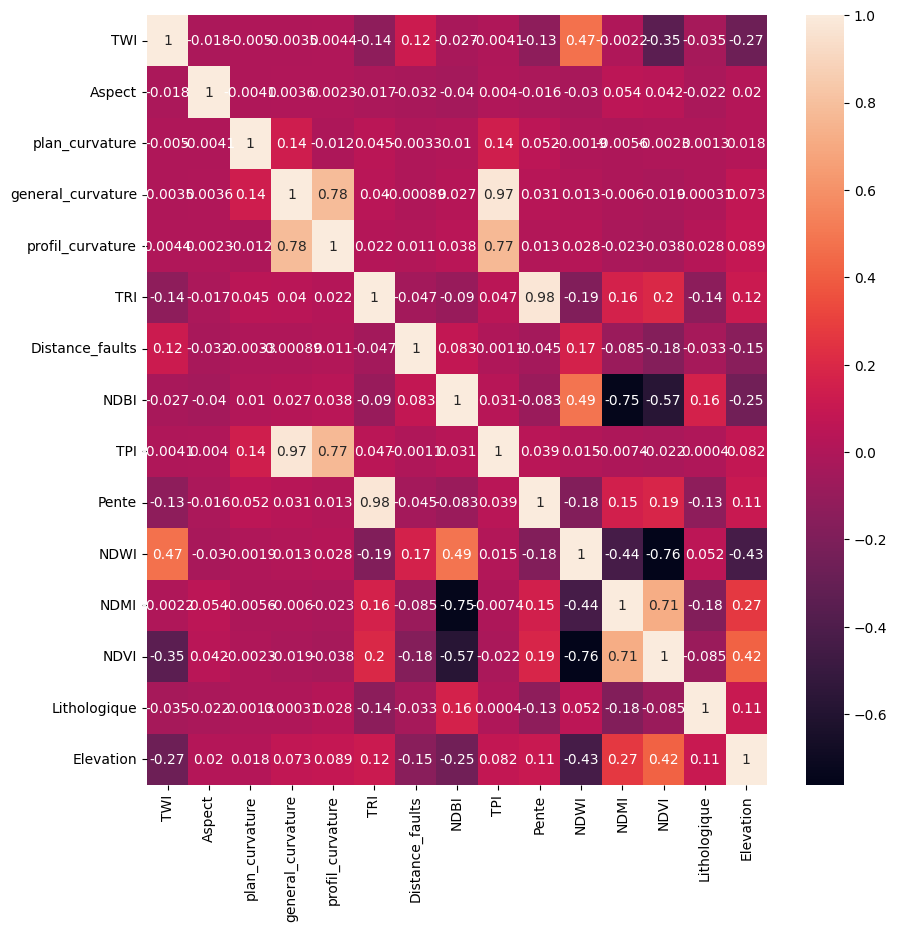

In [ ]:
fig, ax = plt.subplots(figsize=(10,10)) # to resize the heatmap
sns.heatmap(data_brute_considere.drop(["X","Y","Id","Mineralogie"],axis=1).corr(), annot=True, ax=ax)

# Enregistrer l’image (PNG, haute résolution)
plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches='tight')

plt.show()

**1. Random Forest**

In [ ]:
# utilisation d'un échnatillon suppose que df est ton dataset complet
df_sample = data_brute_considere.sample(frac=0.10, random_state=42)  # 10%
print(df_sample.shape)

(747084, 19)


In [ ]:
df_sample.columns

Index(['X', 'Y', 'Id', 'TWI', 'Aspect', 'plan_curvature', 'general_curvature',
       'profil_curvature', 'TRI', 'Distance_faults', 'NDBI', 'TPI', 'Pente',
       'NDWI', 'NDMI', 'NDVI', 'Mineralogie', 'Lithologique', 'Elevation'],
      dtype='object')

In [ ]:
#Equilibrer les classes (0/1)

#df_0 = df_sample[df_sample['Mineralogie_projectée'] == 0]
#df_1 = df_sample[df_sample['Mineralogie_projectée'] == 1]

#df_1_upsampled = resample(df_1,
#                          replace=True,
#                          n_samples=len(df_0),
#                          random_state=42)

#df_balanced = pd.concat([df_0, df_1_upsampled])
#print(df_balanced['Mineralogie_projectée'].value_counts())

In [ ]:
#coords = df_balanced[['X', 'Y']]
#X = df_balanced.drop(['X', 'Y', 'id','Mineralogie_projectée'], axis=1)
#y = df_balanced['Mineralogie_projectée'].astype(int)

In [ ]:
coords = df_sample[['X', 'Y']]
X = df_sample.drop(['X', 'Y', 'Id','Mineralogie'], axis=1)
y = df_sample['Mineralogie'].astype(int)

In [ ]:
# Séparation données train/test
# train : 80% et test : 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialisation du Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=25,
    max_features='sqrt',
    class_weight=None,
    n_jobs=-1
)

# Entraînement
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, n_estimators=200, n_jobs=-1)

In [ ]:
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98    132973
           1       0.86      0.74      0.80     16444

    accuracy                           0.96    149417
   macro avg       0.91      0.86      0.89    149417
weighted avg       0.96      0.96      0.96    149417



In [ ]:
#proba = rf_model.predict_proba(X_test)[:,1]
#print("ROC-AUC :", roc_auc_score(y_test, proba))

In [ ]:
features = rf_model.feature_names_in_
print(features)

['TWI' 'Aspect' 'plan_curvature' 'general_curvature' 'profil_curvature'
 'TRI' 'Distance_faults' 'NDBI' 'TPI' 'Pente' 'NDWI' 'NDMI' 'NDVI'
 'Lithologique' 'Elevation']


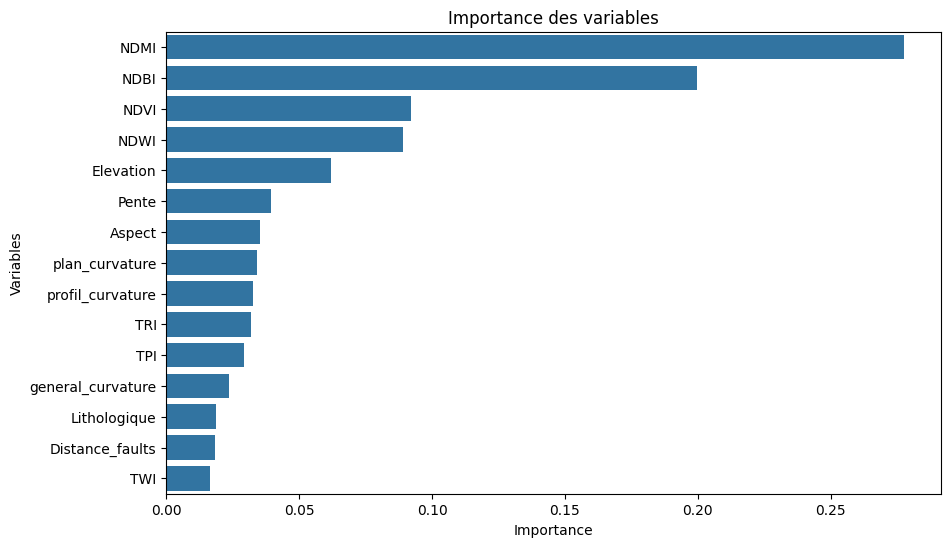

In [ ]:
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Importance des variables")
plt.xlabel("Importance")
plt.ylabel("Variables")

plt.savefig("importance_variables_random_forest.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
data_brute_considere.columns

Index(['X', 'Y', 'Id', 'TWI', 'Aspect', 'plan_curvature', 'general_curvature',
       'profil_curvature', 'TRI', 'Distance_faults', 'NDBI', 'TPI', 'Pente',
       'NDWI', 'NDMI', 'NDVI', 'Mineralogie', 'Lithologique', 'Elevation'],
      dtype='object')

In [ ]:
data_brute_clean = data_brute_considere.drop(columns=['Mineralogie', 'X', 'Y', 'Id'])

In [ ]:
data_brute_considere['proba_rf'] = rf_model.predict_proba(data_brute_clean)[:,1]

In [ ]:
#data_brute['proba_rf'] = rf_model.predict_proba(data_brute_clean)[:,1]

KeyboardInterrupt: 

In [ ]:
#data_brute.columns
data_brute_considere.columns

Index(['X', 'Y', 'Id', 'TWI', 'Aspect', 'plan_curvature', 'general_curvature',
       'profil_curvature', 'TRI', 'Distance_faults', 'NDBI', 'TPI', 'Pente',
       'NDWI', 'NDMI', 'NDVI', 'Mineralogie', 'Lithologique', 'Elevation',
       'proba_rf'],
      dtype='object')

In [ ]:
joblib.dump(rf_model, "model_mining_rf.pkl")

['model_mining_rf.pkl']

In [ ]:
data_brute.to_csv("dataset_RF.csv", index=False)

**Convertir les données en Raster**

In [ ]:
!pip install rasterio affine

In [ ]:
import numpy as np
import pandas as pd
import rasterio
from rasterio.transform import from_origin
from rasterio.enums import Resampling
from rasterio import Affine

**Créer un sous ensemble qui prends uniquement les données géolocalisée et la probabilité calculée selon RF**

In [ ]:
assert {'X', 'Y', 'proba_rf'}.issubset(data_brute_considere.columns)

In [ ]:
res = 30.0
nodata = -9999.0
dtype = 'float32'
crs = 'EPSG:32733'

In [ ]:
minx = float(data_brute_considere['X'].min())
maxx = float(data_brute_considere['X'].max())
miny = float(data_brute_considere['Y'].min())
maxy = float(data_brute_considere['Y'].max())

In [ ]:
minx_aligned = np.floor(minx / res) * res
miny_aligned = np.floor(miny / res) * res
maxx_aligned = np.ceil(maxx / res) * res
maxy_aligned = np.ceil(maxy / res) * res

In [ ]:
width = int((maxx_aligned - minx_aligned) / res)
height = int((maxy_aligned - miny_aligned) / res)

In [ ]:
print(f"Extent aligned: X [{minx_aligned}, {maxx_aligned}] Y [{miny_aligned}, {maxy_aligned}]")
print(f"Raster size: width={width}, height={height}  (total pixels = {width*height:,})")

Extent aligned: X [288420.0, 352110.0] Y [9351060.0, 9456630.0]
Raster size: width=2123, height=3519  (total pixels = 7,470,837)


In [ ]:
if width * height > 100_000_000:
    print("ATTENTION: raster très grand (>100M pixels). Considère augmenter l'échantillonnage ou utiliser un bloc/chunking.")

In [ ]:
cols = ((data_brute_considere['X'].values - minx_aligned) / res).astype(np.int64)
rows = ((maxy_aligned - data_brute_considere['Y'].values) / res).astype(np.int64)

In [ ]:
valid_mask = (cols >= 0) & (cols < width) & (rows >= 0) & (rows < height)
df_valid = pd.DataFrame({
    'row': rows[valid_mask],
    'col': cols[valid_mask],
    'proba_rf': data_brute_considere['proba_rf'].values[valid_mask]
})

print(f"Points valides conservés: {len(df_valid):,}")

Points valides conservés: 7,470,837


In [ ]:
agg = df_valid.groupby(['row', 'col'], sort=False, as_index=False)['proba_rf'].mean()
print("Nombre de cellules uniques avec données :", len(agg))

Nombre de cellules uniques avec données : 7470837


In [ ]:
# 4) Création du raster en mémoire (initialisé à nodata)
# ---------------------------
raster = np.full((height, width), nodata, dtype=np.float32)

In [ ]:
# Assignation: raster[row, col] = proba
raster[agg['row'].values, agg['col'].values] = agg['proba_rf'].values.astype(np.float32)

In [ ]:
# 5) Métadonnées et écriture GeoTIFF
# ---------------------------
transform = from_origin(minx_aligned, maxy_aligned, res, res)  # (left, top, xres, yres)

out_path = "/content/probability_map_rf.tif"

new_dataset = rasterio.open(
    out_path,
    'w',
    driver='GTiff',
    height=height,
    width=width,
    count=1,
    dtype=dtype,
    crs=crs,
    transform=transform,
    nodata=nodata,
    compress='lzw'
)

new_dataset.write(raster, 1)
new_dataset.close()

print(f"GeoTIFF écrit : {out_path}")

GeoTIFF écrit : /content/probability_map_rf.tif


**2. Support Vector Machine (SVM)**

**Echantillonnage**

In [ ]:
#from sklearn.model_selection import train_test_split

# Echantillonnage

# X, y : vos données complètes
#sample_size = 40000  # ajuster selon RAM
#_, X_sample, _, y_sample = train_test_split(
#    X, y, train_size=sample_size, stratify=y, random_state=42
#)

Nous avons recouru à l'échantillon, pour reduire les temps

In [ ]:
# utilisation d'un échnatillon suppose que df est ton dataset complet
#df_sample = data_brute_considere.sample(frac=0.10, random_state=42)
df_sample = data_brute_considere.sample(n=50000, random_state=42)
print(df_sample.shape)

(50000, 19)


In [ ]:
df_sample.columns

Index(['X', 'Y', 'Id', 'TWI', 'Aspect', 'plan_curvature', 'general_curvature',
       'profil_curvature', 'TRI', 'Distance_faults', 'NDBI', 'TPI', 'Pente',
       'NDWI', 'NDMI', 'NDVI', 'Mineralogie', 'Lithologique', 'Elevation'],
      dtype='object')

In [ ]:
coords = df_sample[['X', 'Y']]
X = df_sample.drop(['X', 'Y', 'Id','Mineralogie'], axis=1)
y = df_sample['Mineralogie'].astype(int)

In [ ]:
# les ressources
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score

Vu que les données très lourd, je standardiser mes variables.

In [ ]:
# Séparation données train/test
# train : 80% et test : 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
#rf_model.fit(X_train, y_train)

In [ ]:
# Modele SVM

svm_model = SVC(kernel='rbf',C=1.0,gamma='scale',probability=True)

# Entrainement

svm_model.fit(X_train_scaled, y_train)

SVC(probability=True)

In [ ]:
joblib.dump(svm_model, "model_mining_svm.pkl")

['model_mining_svm.pkl']

In [ ]:
# Modèle SVM
# svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)
# Entraînement
# svm_model.fit(X_train, y_train)

In [ ]:
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
# Prédictions
# y_pred_svm = svm_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      8862
           1       0.88      0.70      0.78      1138

    accuracy                           0.96     10000
   macro avg       0.92      0.84      0.88     10000
weighted avg       0.95      0.96      0.95     10000



In [ ]:
# Afficher les noms des features
feature_names = X_train.columns
print("Features : ", feature_names.tolist())

Features :  ['TWI', 'Aspect', 'plan_curvature', 'general_curvature', 'profil_curvature', 'TRI', 'Distance_faults', 'NDBI', 'TPI', 'Pente', 'NDWI', 'NDMI', 'NDVI', 'Lithologique', 'Elevation']


In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
# Importance des features avec permutation importance
result = permutation_importance(svm_model, X_test_scaled, y_test, n_repeats=10, random_state=42, n_jobs=-1)
importance = pd.DataFrame({'Feature': feature_names, 'Importance': result.importances_mean})
importance = importance.sort_values(by='Importance', ascending=False)
print("\nFeature importances (approximation par permutation) :\n", importance)


Feature importances (approximation par permutation) :
               Feature  Importance
7                NDBI     0.05833
11               NDMI     0.03905
6     Distance_faults     0.00092
12               NDVI     0.00075
10               NDWI     0.00069
3   general_curvature     0.00052
8                 TPI     0.00050
9               Pente     0.00040
13       Lithologique     0.00037
1              Aspect     0.00032
14          Elevation     0.00028
2      plan_curvature     0.00024
5                 TRI     0.00021
4    profil_curvature     0.00017
0                 TWI     0.00008


/tmp/ipython-input-2732118941.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance, palette='viridis')


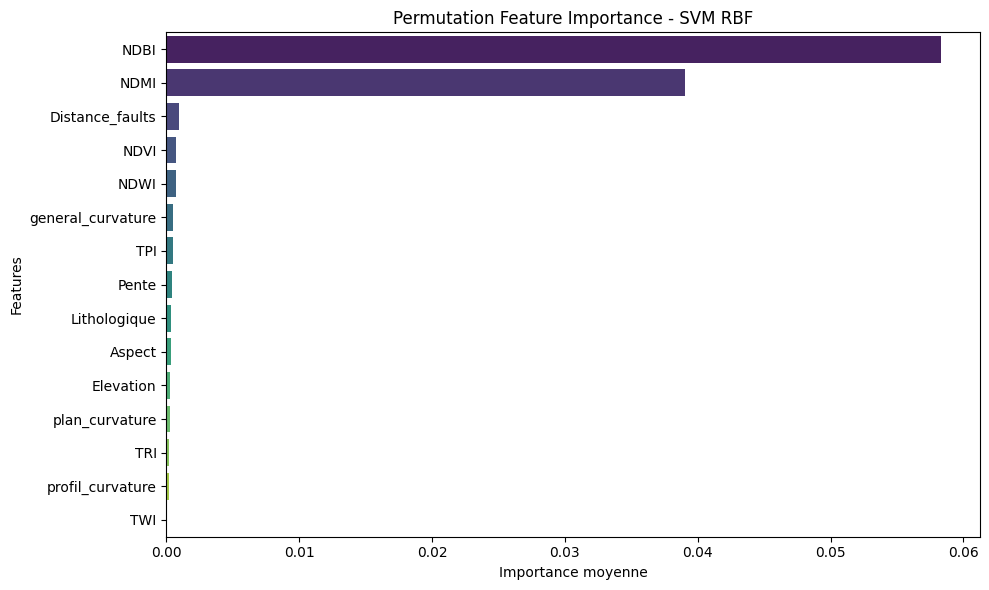

In [ ]:
# Visualisation avec Seaborn
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance, palette='viridis')
plt.title("Permutation Feature Importance - SVM RBF")
plt.xlabel("Importance moyenne")
plt.ylabel("Features")
plt.tight_layout()

plt.savefig("importance_variables_SVM.png", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
data_brute_considere.columns

Index(['X', 'Y', 'Id', 'TWI', 'Aspect', 'plan_curvature', 'general_curvature',
       'profil_curvature', 'TRI', 'Distance_faults', 'NDBI', 'TPI', 'Pente',
       'NDWI', 'NDMI', 'NDVI', 'Mineralogie', 'Lithologique', 'Elevation'],
      dtype='object')

In [ ]:
data_brute_clean_full = data_brute_considere.drop(columns=['Mineralogie', 'X', 'Y', 'Id'])

In [ ]:
data_brute_clean_full.columns.tolist()

['TWI',
 'Aspect',
 'plan_curvature',
 'general_curvature',
 'profil_curvature',
 'TRI',
 'Distance_faults',
 'NDBI',
 'TPI',
 'Pente',
 'NDWI',
 'NDMI',
 'NDVI',
 'Lithologique',
 'Elevation']

In [ ]:
data_brute_clean_full_scaled = scaler.transform(data_brute_clean_full)

In [ ]:
#data_brute_considere['proba_rf'] = svm_model.predict_proba(data_brute_clean_full_scaled)[:,1]
data_brute_proba= svm_model.predict_proba(data_brute_clean_full_scaled)[:,1]

In [ ]:
# --- 5. Préparer les données complètes pour extrapolation ---
# X_full = data_brute_considere.drop('target', axis=1)
# X_full_scaled = scaler.transform(X_full)

In [ ]:
# --- 6. Prédire les probabilités sur tout le dataset ---
# cuML SVM renvoie directement la probabilité pour la classe positive
# proba_full = svm_model.predict_proba(X_full_scaled)[:, 1]
# --- 7. Ajouter les résultats au dataframe ---
data_brute_considere['proba_svm'] = data_brute_proba

print(data_brute_considere.head())

            X             Y  Id       TWI      Aspect  plan_curvature  \
0  288447.161  9.456612e+06   1  1.021395  178.388857        -0.00175   
1  288447.161  9.456582e+06   2  1.021395  178.388857        -0.00175   
2  288447.161  9.456552e+06   3  1.021395  178.388857        -0.00175   
3  288447.161  9.456522e+06   4  1.021395  178.388857        -0.00175   
4  288447.161  9.456492e+06   5  1.021395  178.388857        -0.00175   

   general_curvature  profil_curvature        TRI  Distance_faults      NDBI  \
0          -0.000006         -0.000175  13.732186         2.462532  1.176236   
1          -0.000006         -0.000175  13.732186         2.462532  1.176236   
2          -0.000006         -0.000175  13.732186         2.462532  1.176236   
3          -0.000006         -0.000175  13.732186         2.462532  1.176236   
4          -0.000006         -0.000175  13.732186         2.462532  1.176236   

        TPI     Pente      NDWI      NDMI      NDVI  Mineralogie  \
0 -0.001362 

In [ ]:
data_brute_considere.columns.tolist()

['X',
 'Y',
 'Id',
 'TWI',
 'Aspect',
 'plan_curvature',
 'general_curvature',
 'profil_curvature',
 'TRI',
 'Distance_faults',
 'NDBI',
 'TPI',
 'Pente',
 'NDWI',
 'NDMI',
 'NDVI',
 'Mineralogie',
 'Lithologique',
 'Elevation',
 'proba_svm']

In [ ]:
data_brute_considere.shape

(7470837, 20)

**Création d'un raster à partir de proba_svm**

In [ ]:
assert {'X', 'Y', 'proba_svm'}.issubset(data_brute_considere.columns)

In [ ]:
res = 30.0
nodata = -9999.0
dtype = 'float32'
crs = 'EPSG:32733'

In [ ]:
minx = float(data_brute_considere['X'].min())
maxx = float(data_brute_considere['X'].max())
miny = float(data_brute_considere['Y'].min())
maxy = float(data_brute_considere['Y'].max())

In [ ]:
minx_aligned = np.floor(minx / res) * res
miny_aligned = np.floor(miny / res) * res
maxx_aligned = np.ceil(maxx / res) * res
maxy_aligned = np.ceil(maxy / res) * res

In [ ]:
width = int((maxx_aligned - minx_aligned) / res)
height = int((maxy_aligned - miny_aligned) / res)

In [ ]:
print(f"Extent aligned: X [{minx_aligned}, {maxx_aligned}] Y [{miny_aligned}, {maxy_aligned}]")
print(f"Raster size: width={width}, height={height}  (total pixels = {width*height:,})")

Extent aligned: X [288420.0, 352110.0] Y [9351060.0, 9456630.0]
Raster size: width=2123, height=3519  (total pixels = 7,470,837)


In [ ]:
if width * height > 100_000_000:
    print("ATTENTION: raster très grand (>100M pixels). Considère augmenter l'échantillonnage ou utiliser un bloc/chunking.")

In [ ]:
cols = ((data_brute_considere['X'].values - minx_aligned) / res).astype(np.int64)
rows = ((maxy_aligned - data_brute_considere['Y'].values) / res).astype(np.int64)

In [ ]:
valid_mask = (cols >= 0) & (cols < width) & (rows >= 0) & (rows < height)
df_valid = pd.DataFrame({
    'row': rows[valid_mask],
    'col': cols[valid_mask],
    'proba_svm': data_brute_considere['proba_svm'].values[valid_mask]
})

print(f"Points valides conservés: {len(df_valid):,}")

Points valides conservés: 7,470,837


In [ ]:
agg = df_valid.groupby(['row', 'col'], sort=False, as_index=False)['proba_svm'].mean()
print("Nombre de cellules uniques avec données :", len(agg))

Nombre de cellules uniques avec données : 7470837


In [ ]:
# 4) Création du raster en mémoire (initialisé à nodata)
# ---------------------------
raster = np.full((height, width), nodata, dtype=np.float32)

In [ ]:
# Assignation: raster[row, col] = proba
raster[agg['row'].values, agg['col'].values] = agg['proba_svm'].values.astype(np.float32)

In [ ]:
# 5) Métadonnées et écriture GeoTIFF
# ---------------------------
transform = from_origin(minx_aligned, maxy_aligned, res, res)  # (left, top, xres, yres)

out_path = "/content/probability_map_svm.tif"

new_dataset = rasterio.open(
    out_path,
    'w',
    driver='GTiff',
    height=height,
    width=width,
    count=1,
    dtype=dtype,
    crs=crs,
    transform=transform,
    nodata=nodata,
    compress='lzw'
)

new_dataset.write(raster, 1)
new_dataset.close()

print(f"GeoTIFF écrit : {out_path}")

GeoTIFF écrit : /content/probability_map_svm.tif


**Vérification de la suppression de fond noir qui encadre la carte**

In [ ]:
import rasterio
import numpy as np

with rasterio.open('probability_map_svm.tif') as src:
    raster = src.read(1)
    profile = src.profile

# Suppression du fond noir
raster[raster == 0] = np.nan  # mettre les valeurs 0 en NoData
profile.update(dtype=rasterio.float32, nodata=np.nan)

with rasterio.open('svm_proba_clean.tif', 'w', **profile) as dst:
    dst.write(raster.astype(rasterio.float32), 1)


In [ ]:
# Probabilités
# proba_svm = svm_model.predict_proba(X_test)[:, 1]

In [ ]:
# Métriques
# acc_svm = accuracy_score(y_test, y_pred_svm)
# auc_svm = roc_auc_score(y_test, proba_svm)

#print("Accuracy SVM :", acc_svm)
#print("ROC-AUC SVM :", auc_svm)

In [ ]:
#data['proba_svm'] = xgb.predict_proba(data[features])[:, 1]

**3.XGBOOST(eXtreme Gradient Boosting)**

In [ ]:
# utilisation d'un échnatillon suppose que df est ton dataset complet
df_sample = data_brute_considere.sample(frac=0.10, random_state=42)  # 10%
print(df_sample.shape)

(747084, 19)


In [ ]:
df_sample.columns

Index(['X', 'Y', 'Id', 'TWI', 'Aspect', 'plan_curvature', 'general_curvature',
       'profil_curvature', 'TRI', 'Distance_faults', 'NDBI', 'TPI', 'Pente',
       'NDWI', 'NDMI', 'NDVI', 'Mineralogie', 'Lithologique', 'Elevation'],
      dtype='object')

In [ ]:
coords = df_sample[['X', 'Y']]
X = df_sample.drop(['X', 'Y', 'Id','Mineralogie'], axis=1)
y = df_sample['Mineralogie'].astype(int)

In [ ]:
# Séparation données train/test
# train : 80% et test : 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import rasterio
from rasterio.transform import from_origin
from rasterio.enums import Resampling
from rasterio import Affine

In [ ]:
# Modèle XGBoost
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)

# Entraînement
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
joblib.dump(xgb, "model_mining_xgb.pkl")

['model_mining_xgb.pkl']

In [ ]:
# Prédictions
y_pred_xgb = xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98    132973
           1       0.86      0.74      0.80     16444

    accuracy                           0.96    149417
   macro avg       0.92      0.86      0.89    149417
weighted avg       0.96      0.96      0.96    149417



In [ ]:
features = xgb.feature_names_in_

In [ ]:
print(features)

['TWI' 'Aspect' 'plan_curvature' 'general_curvature' 'profil_curvature'
 'TRI' 'Distance_faults' 'NDBI' 'TPI' 'Pente' 'NDWI' 'NDMI' 'NDVI'
 'Lithologique' 'Elevation']


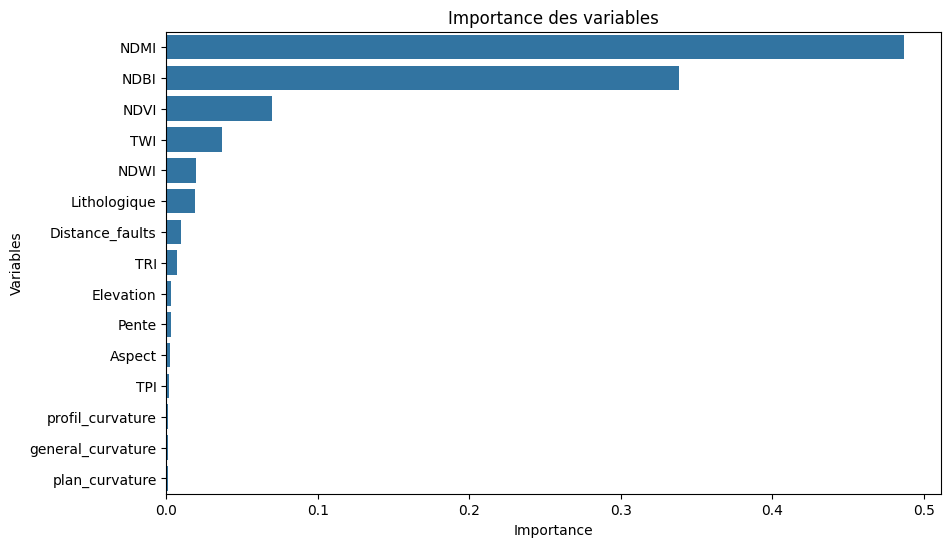

In [ ]:
feature_importances = pd.Series(xgb.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Importance des variables")
plt.xlabel("Importance")
plt.ylabel("Variables")

plt.savefig("importance_variables_random_forest.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
data_brute_considere.columns

Index(['X', 'Y', 'Id', 'TWI', 'Aspect', 'plan_curvature', 'general_curvature',
       'profil_curvature', 'TRI', 'Distance_faults', 'NDBI', 'TPI', 'Pente',
       'NDWI', 'NDMI', 'NDVI', 'Mineralogie', 'Lithologique', 'Elevation'],
      dtype='object')

In [ ]:
data_brute_clean = data_brute_considere.drop(columns=['Mineralogie', 'X', 'Y', 'Id'])

In [ ]:
data_brute_considere['proba_xgb'] = xgb.predict_proba(data_brute_clean)[:,1]

In [ ]:
data_brute_considere.columns

Index(['X', 'Y', 'Id', 'TWI', 'Aspect', 'plan_curvature', 'general_curvature',
       'profil_curvature', 'TRI', 'Distance_faults', 'NDBI', 'TPI', 'Pente',
       'NDWI', 'NDMI', 'NDVI', 'Mineralogie', 'Lithologique', 'Elevation',
       'proba_xgb'],
      dtype='object')

In [ ]:
# Probabilités
proba_xgb = xgb.predict_proba(X_test)[:, 1]

In [ ]:
# Métriques
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy XGBoost :", acc_xgb)

Accuracy XGBoost : 0.9581908350455437


In [ ]:
proba_xgbe = data_brute_considere['proba_xgb']

In [ ]:
auc_xgb = roc_auc_score(y_test, proba_xgb)
#print("Accuracy XGBoost :", acc_xgb)
print("ROC-AUC XGBoost :", auc_xgb)

ROC-AUC XGBoost : 0.9779494037178164


**Visualiser la courbe de ROC**

ROC-AUC XGBoost : 0.9779494037178164


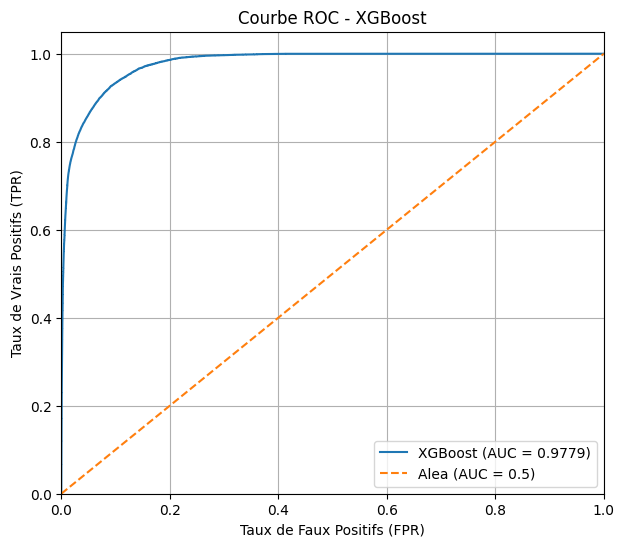

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, proba_xgb)
roc_auc = auc(fpr, tpr)

print("ROC-AUC XGBoost :", roc_auc)

# Visualisation
plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, label='XGBoost (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', label='Alea (AUC = 0.5)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC - XGBoost')
plt.legend(loc="lower right")
plt.grid(True)

plt.savefig("Courbe de Roc pour le modele XSBOOST.png", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(y_test, y_pred_xgb)
print("Kappa :", kappa)

Kappa : 0.772220511378545


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb, X_train, y_train, cv=5, scoring='accuracy')
print("Scores CV :", scores)
print("Moyenne CV :", scores.mean())
print("Ecart-type ", scores.std())

Scores CV : [0.95822946 0.95837168 0.95679854 0.9590155  0.95766023]
Moyenne CV : 0.9580150810217523
Ecart-type  0.0007456340223268841


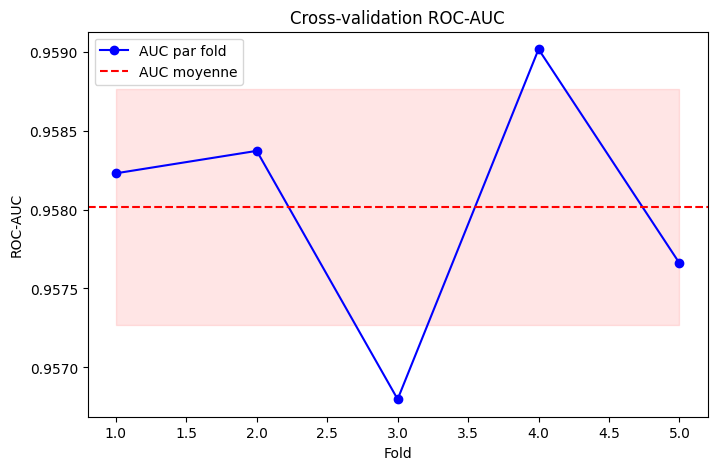

In [ ]:
# Graphique
plt.figure(figsize=(8,5))
plt.plot(range(1, len(scores)+1), scores, marker='o', linestyle='-', color='b', label='AUC par fold')
plt.axhline(y=scores.mean(), color='r', linestyle='--', label='AUC moyenne')
plt.fill_between(range(1, len(scores)+1), scores.mean()-scores.std(), scores.mean()+scores.std(), color='r', alpha=0.1)
plt.xlabel('Fold')
plt.ylabel('ROC-AUC')
plt.title('Cross-validation ROC-AUC')
plt.legend()
plt.show()

**Création de la carte prédicte avec XGBOOST**

In [ ]:
data_brute_considere.columns

Index(['X', 'Y', 'Id', 'TWI', 'Aspect', 'plan_curvature', 'general_curvature',
       'profil_curvature', 'TRI', 'Distance_faults', 'NDBI', 'TPI', 'Pente',
       'NDWI', 'NDMI', 'NDVI', 'Mineralogie', 'Lithologique', 'Elevation',
       'proba_xgb'],
      dtype='object')

In [ ]:
assert {'X', 'Y', 'proba_xgb'}.issubset(data_brute_considere.columns)

In [ ]:
res = 30.0
nodata = -9999.0
dtype = 'float32'
crs = 'EPSG:32733'

In [ ]:
minx = float(data_brute_considere['X'].min())
maxx = float(data_brute_considere['X'].max())
miny = float(data_brute_considere['Y'].min())
maxy = float(data_brute_considere['Y'].max())

In [ ]:
minx_aligned = np.floor(minx / res) * res
miny_aligned = np.floor(miny / res) * res
maxx_aligned = np.ceil(maxx / res) * res
maxy_aligned = np.ceil(maxy / res) * res

In [ ]:
width = int((maxx_aligned - minx_aligned) / res)
height = int((maxy_aligned - miny_aligned) / res)

In [ ]:
print(f"Extent aligned: X [{minx_aligned}, {maxx_aligned}] Y [{miny_aligned}, {maxy_aligned}]")
print(f"Raster size: width={width}, height={height}  (total pixels = {width*height:,})")

Extent aligned: X [288420.0, 352110.0] Y [9351060.0, 9456630.0]
Raster size: width=2123, height=3519  (total pixels = 7,470,837)


In [ ]:
if width * height > 100_000_000:
    print("ATTENTION: raster très grand (>100M pixels). Considère augmenter l'échantillonnage ou utiliser un bloc/chunking.")

In [ ]:
cols = ((data_brute_considere['X'].values - minx_aligned) / res).astype(np.int64)
rows = ((maxy_aligned - data_brute_considere['Y'].values) / res).astype(np.int64)

In [ ]:
valid_mask = (cols >= 0) & (cols < width) & (rows >= 0) & (rows < height)
df_valid = pd.DataFrame({
    'row': rows[valid_mask],
    'col': cols[valid_mask],
    'proba_xgb': data_brute_considere['proba_xgb'].values[valid_mask]
})

print(f"Points valides conservés: {len(df_valid):,}")

Points valides conservés: 7,470,837


In [ ]:
agg = df_valid.groupby(['row', 'col'], sort=False, as_index=False)['proba_xgb'].mean()
print("Nombre de cellules uniques avec données :", len(agg))

Nombre de cellules uniques avec données : 7470837


In [ ]:
# 4) Création du raster en mémoire (initialisé à nodata)
# ---------------------------
raster = np.full((height, width), nodata, dtype=np.float32)

# Assignation: raster[row, col] = proba
raster[agg['row'].values, agg['col'].values] = agg['proba_xgb'].values.astype(np.float32)

In [ ]:
# 5) Métadonnées et écriture GeoTIFF
# ---------------------------
transform = from_origin(minx_aligned, maxy_aligned, res, res)  # (left, top, xres, yres)

out_path = "/content/probability_map_xgb.tif"

new_dataset = rasterio.open(
    out_path,
    'w',
    driver='GTiff',
    height=height,
    width=width,
    count=1,
    dtype=dtype,
    crs=crs,
    transform=transform,
    nodata=nodata,
    compress='lzw'
)

new_dataset.write(raster, 1)
new_dataset.close()

print(f"GeoTIFF écrit : {out_path}")

GeoTIFF écrit : /content/probability_map_xgb.tif


**4. K plus proche voisin(KNN)**

In [ ]:
# Ressources
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
print(f"toutes les ressources : sont bien installé pour l'algorithme KNN")

In [ ]:
# Modèle KNN
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')

# Entraînement
knn.fit(X_imputed_train, y_train.astype(int))

# Prédictions
y_pred_knn = knn.predict(X_imputed_test)

# Probabilités pour la cartographie
proba_knn = knn.predict_proba(X_imputed_test)[:, 1]

# Métriques
acc_knn = accuracy_score(y_test, y_pred_knn)
auc_knn = roc_auc_score(y_test, proba_knn)

print("Accuracy KNN :", acc_knn)
print("ROC-AUC KNN :", auc_knn)


In [ ]:
data['proba_knn'] = xgb.predict_proba(data[features])[:, 1]

**Reseau de Neurones Artificiel (AAR)**

In [2]:
## Chargement des ressources
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sy
import geopandas
import rasterio
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, roc_auc_score
import joblib
from scipy.interpolate import griddata
from sklearn.utils import resample
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
print(f"les Ressources sont bien installées")

les Ressources sont bien installées


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')

In [5]:
#data_brute = pd.read_csv("dataset.csv")/content/drive/MyDrive/dataset.csv
data_brute = pd.read_csv("/content/drive/MyDrive/dataset.csv")
print(f"la structure des données : {data_brute.shape}")

la structure des données : (7470837, 22)


In [6]:
data_brute.columns = data_brute.columns.str.strip()
data_brute.columns = data_brute.columns.str.replace(' ', '_')
data_brute.columns = data_brute.columns.str.replace('-', '_')
data_brute.columns = data_brute.columns.str.lower()

In [7]:
print(f"Description des variables: {data_brute.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7470837 entries, 0 to 7470836
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   x                      float64
 1   y                      float64
 2   id                     int64  
 3   dem_seke_b             float64
 4   dem_sk_rep             float64
 5   twi                    float64
 6   aspect_copie           float64
 7   plan_curvature         float64
 8   general_curvature      float64
 9   profil_curvature       float64
 10  tri_1                  float64
 11  distance_faults        float64
 12  ndbi_sk_ok             float64
 13  tpi                    float64
 14  pente_sk               float64
 15  ndwi_ok                float64
 16  ndmi                   float64
 17  ndvi_ok                float64
 18  mineralogie_projectée  float64
 19  dem_lithologique       float64
 20  elevation              float64
 21  dem_sk_reprojecte      float64
dtypes: float64(21), in

In [8]:
data_brute_considere_ann = data_brute.drop(['dem_seke_b','dem_sk_rep','dem_sk_reprojecte'], axis=1)

In [9]:
data_brute_considere_ann.columns.tolist()

['x',
 'y',
 'id',
 'twi',
 'aspect_copie',
 'plan_curvature',
 'general_curvature',
 'profil_curvature',
 'tri_1',
 'distance_faults',
 'ndbi_sk_ok',
 'tpi',
 'pente_sk',
 'ndwi_ok',
 'ndmi',
 'ndvi_ok',
 'mineralogie_projectée',
 'dem_lithologique',
 'elevation']

In [10]:
data_brute_considere_ann = data_brute_considere_ann.rename(columns={
    'aspect_copie': 'Aspect',
    'x': 'X',
    'y': 'Y',
    'id': 'Id',
    'tri_1': 'TRI',
    'ndbi_sk_ok':'NDBI',
    'pente_sk':'Pente',
    'ndwi_ok' : 'NDWI',
    'ndvi_ok' : 'NDVI',
    'mineralogie_projectée' : 'Mineralogie',
    'dem_lithologique' : 'Lithologique',
    'ndmi' : 'NDMI',
    'elevation' : 'Elevation',
    'twi':'TWI',
    'tpi':'TPI',
    'distance_faults':'Distance_faults'
})

In [11]:
data_brute_considere_ann.columns.values.tolist()

['X',
 'Y',
 'Id',
 'TWI',
 'Aspect',
 'plan_curvature',
 'general_curvature',
 'profil_curvature',
 'TRI',
 'Distance_faults',
 'NDBI',
 'TPI',
 'Pente',
 'NDWI',
 'NDMI',
 'NDVI',
 'Mineralogie',
 'Lithologique',
 'Elevation']

In [12]:
data_brute_considere_ann.head()

,X,Y,Id,TWI,Aspect,plan_curvature,general_curvature,profil_curvature,TRI,Distance_faults,NDBI,TPI,Pente,NDWI,NDMI,NDVI,Mineralogie,Lithologique,Elevation
0,288447.161,9.456612e+06,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,288447.161,9.456582e+06,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,288447.161,9.456552e+06,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,288447.161,9.456522e+06,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,288447.161,9.456492e+06,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
data_brute_considere_ann.tail()

,X,Y,Id,TWI,Aspect,plan_curvature,general_curvature,profil_curvature,TRI,Distance_faults,NDBI,TPI,Pente,NDWI,NDMI,NDVI,Mineralogie,Lithologique,Elevation
7470832,352107.161,9.351192e+06,7470833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7470833,352107.161,9.351162e+06,7470834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7470834,352107.161,9.351132e+06,7470835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7470835,352107.161,9.351102e+06,7470836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7470836,352107.161,9.351072e+06,7470837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
data_brute_considere_ann.describe()

,X,Y,Id,TWI,Aspect,plan_curvature,general_curvature,profil_curvature,TRI,Distance_faults,NDBI,TPI,Pente,NDWI,NDMI,NDVI,Mineralogie,Lithologique,Elevation
count,7.470837e+06,7.470837e+06,7.470837e+06,4.139450e+06,4.029946e+06,4.035413e+06,4.035413e+06,4.035413e+06,4.019998e+06,4.037208e+06,4.035432e+06,4.019998e+06,4.019998e+06,4.035525e+06,4.035525e+06,4.035494e+06,4.035664e+06,4.027019e+06,4.035413e+06
mean,3.202772e+05,9.403842e+06,3.735419e+06,1.021395e+00,1.783889e+02,-1.750055e-03,-5.624909e-06,-1.754974e-04,1.373219e+01,2.462532e+00,1.176236e+00,-1.361606e-03,9.336931e+00,1.143939e+00,3.502743e+00,3.454494e+00,2.046018e-01,5.778606e+01,3.719595e+02
std,1.838572e+04,3.047543e+04,2.156645e+06,1.523560e-01,1.003059e+02,6.334154e-02,6.463596e-03,2.034184e-03,1.023402e+01,1.047857e+00,3.816639e-01,1.945250e+00,7.069241e+00,3.991835e-01,8.663185e-01,7.472622e-01,4.034104e-01,1.192977e+01,1.197777e+02
min,2.884472e+05,9.351072e+06,1.000000e+00,-2.127981e+01,2.620000e-03,-9.859100e+00,-2.519300e-01,-3.193000e-02,5.365000e-02,0.000000e+00,-4.635100e-01,-7.195129e+01,0.000000e+00,-6.522500e-01,-7.978000e-01,-2.330900e-01,0.000000e+00,3.000000e+01,3.000000e+00
25%,3.043472e+05,9.377442e+06,1.867710e+06,1.000000e+00,9.000000e+01,-5.520000e-03,-3.180000e-03,-1.170000e-03,6.000000e+00,2.000000e+00,1.000000e+00,-1.000000e+00,3.638635e+00,1.000000e+00,3.000000e+00,3.000000e+00,0.000000e+00,4.900000e+01,3.090000e+02
50%,3.202772e+05,9.403842e+06,3.735419e+06,1.000000e+00,1.800000e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01,3.000000e+00,1.000000e+00,0.000000e+00,8.259380e+00,1.000000e+00,4.000000e+00,4.000000e+00,0.000000e+00,5.500000e+01,3.750000e+02
75%,3.362072e+05,9.430242e+06,5.603128e+06,1.000000e+00,2.596952e+02,7.200000e-03,3.180000e-03,8.600000e-04,1.953462e+01,3.000000e+00,1.000000e+00,1.000000e+00,1.364314e+01,1.000000e+00,4.000000e+00,4.000000e+00,0.000000e+00,7.200000e+01,4.400000e+02
max,3.521072e+05,9.456612e+06,7.470837e+06,5.000000e+00,3.600000e+02,1.399041e+01,2.855200e-01,3.967000e-02,2.348404e+02,5.000000e+00,4.000000e+00,8.277441e+01,7.267187e+01,4.000000e+00,5.000000e+00,5.000000e+00,1.000000e+00,7.300000e+01,7.780000e+02


In [15]:
# vérification des données manquantes
veri_data = data_brute_considere_ann.isnull().sum()
#veri_data_0 = data_brute.isna().sum()
print(f"Nombre de données manquantes par variable: {veri_data}")

Nombre de données manquantes par variable: X                          0
Y                          0
Id                         0
TWI                  3331387
Aspect               3440891
plan_curvature       3435424
general_curvature    3435424
profil_curvature     3435424
TRI                  3450839
Distance_faults      3433629
NDBI                 3435405
TPI                  3450839
Pente                3450839
NDWI                 3435312
NDMI                 3435312
NDVI                 3435343
Mineralogie          3435173
Lithologique         3443818
Elevation            3435424
dtype: int64


In [16]:
data_brute_considere_ann.fillna(data_brute_considere_ann.mean(), inplace=True)

In [17]:
data_brute_considere_ann.isnull().sum()

,0
X,0
Y,0
Id,0
TWI,0
Aspect,0
plan_curvature,0
general_curvature,0
profil_curvature,0
TRI,0
Distance_faults,0


**Importing required libraries**

In [18]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
print(f"Librairies bien installés")

Librairies bien installés


**Data Pre-processing, Checking the tensorflow version**


In [19]:
print(tf.__version__)

2.19.0


In [20]:
# utilisation d'un échnatillon suppose que df est ton dataset complet
df_sample = data_brute_considere_ann.sample(frac=0.10, random_state=42)  # 10%
print(df_sample.shape)

(747084, 19)


In [21]:
coords = df_sample[['X', 'Y']]
X = df_sample.drop(['X', 'Y', 'Id','Mineralogie'], axis=1)
y = df_sample['Mineralogie'].astype(int)
#print("Independent variables are:", X)
#print("Dependent variable is:", y)

In [22]:
# Feature Scaling - Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
print(X_scaled)

[[-6.20525579e-04 -1.39417267e-04  1.58596042e-03 ... -4.17258051e-04
   1.11784247e-03  7.75688881e-04]
 [-1.90184899e-01  2.20238918e-01  1.63991119e-01 ... -8.29090645e-01
  -1.00277447e+00  5.69391198e-01]
 [-6.20525579e-04 -1.39417267e-04  1.58596042e-03 ... -4.17258051e-04
   1.11784247e-03  7.75688881e-04]
 ...
 [-6.20525579e-04 -1.39417267e-04  1.58596042e-03 ... -4.17258051e-04
   1.11784247e-03  7.75688881e-04]
 [-1.90184899e-01 -2.17179578e+00 -2.36762707e-01 ...  9.94195788e-01
  -1.23129371e+00 -1.13507618e+00]
 [-6.20525579e-04 -1.39417267e-04  1.58596042e-03 ... -4.17258051e-04
   1.11784247e-03  7.75688881e-04]]


In [24]:
df_sample.shape

(747084, 19)

In [25]:
# Séparation données train/test
# train : 80% et test : 20%
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

In [26]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(597667, 15) (149417, 15)
(597667,) (149417,)


In [27]:
ann = tf.keras.models.Sequential()

**Mise en œuvre de réseaux neuronaux et formation de modèles**

In [28]:
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

**Ajouter après implémetations**

In [29]:
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

In [30]:
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [31]:
#----------------------- Training the model -----------------------#
# Compiling the ANN
# Type of Optimizer = Adam Optimizer, Loss Function =  crossentropy for binary dependent variable, and Optimization is done w.r.t. accuracy
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training the ANN model on training set  (fit method always the same)
# batch_size = 32, the default value, number of epochs  = 100
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)


Epoch 1/100
18678/18678 ━━━━━━━━━━━━━━━━━━━━ 56s 3ms/step - accuracy: 0.9453 - loss: 0.1788
Epoch 2/100
18678/18678 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - accuracy: 0.9566 - loss: 0.1256
Epoch 3/100
18678/18678 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - accuracy: 0.9572 - loss: 0.1218
Epoch 4/100
18678/18678 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - accuracy: 0.9570 - loss: 0.1216
Epoch 5/100
18678/18678 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - accuracy: 0.9569 - loss: 0.1212
Epoch 6/100
18678/18678 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - accuracy: 0.9570 - loss: 0.1205
Epoch 7/100
18678/18678 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - accuracy: 0.9568 - loss: 0.1209
Epoch 8/100
18678/18678 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 0.9573 - loss: 0.1195
Epoch 9/100
18678/18678 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.9567 - loss: 0.1202
Epoch 10/100
18678/18678 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - accuracy: 0.9569 - loss: 0.1195
Epoch 11/100
18678/18678 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 0.9566 -

In [40]:
ann.save("my_modele_ANN.h5")
print("Modèle ANN enregistré sous : my_modele_ANN.h5")

Modèle ANN enregistré sous : my_modele_ANN.h5


In [42]:
import joblib
joblib.dump(scaler, "scaler_ANN.pkl")
print("Scaler enregistré sous : scaler_ANN.pkl")

Scaler enregistré sous : scaler_ANN.pkl


In [33]:
#show the vector of predictions and real values
#probabilities
y_pred_prob_ANN = ann.predict(X_test)

#probabilities to binary
y_pred = (y_pred_prob_ANN > 0.5)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))
print(np.concatenate((np.array(y_pred).reshape(-1,1),
                      np.array(y_test).reshape(-1,1)), axis=1))


#Confusion Matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix", confusion_matrix)
print("Accuracy Score", accuracy_score(y_test, y_pred))

4670/4670 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 0]]
Confusion Matrix [[131013   1905]
 [  4489  12010]]
Accuracy Score 0.9572070112503932


**Courbe de Roc**

In [37]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

In [38]:
# --- ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)

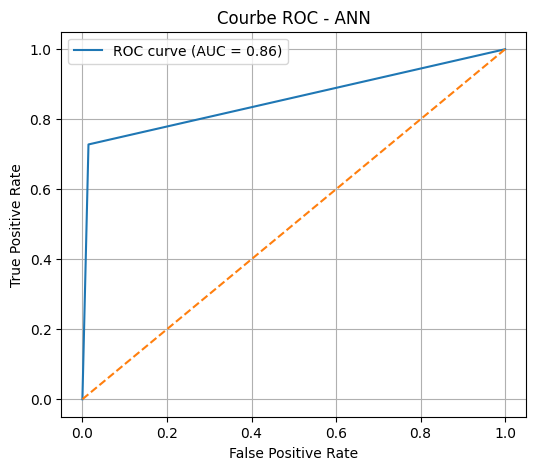

In [39]:
# --- Plot ROC
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc_score:.2f})")
plt.plot([0,1], [0,1], linestyle="--")  # ligne aléatoire
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Courbe ROC - ANN")
plt.legend()
plt.grid(True)
plt.show()